# Entanglement Swapping

Implementation of Alice Bob Charlie example, qubits: $A$ $B$ $C_1$ $C_2$

Statevector([0.5+0.j, 0. +0.j, 0. +0.j, 0.5+0.j, 0. +0.j, 0. +0.j, 0. +0.j,
             0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j, 0.5+0.j, 0. +0.j,
             0. +0.j, 0.5+0.j],
            dims=(2, 2, 2, 2))
DensityMatrix([[0.25+0.j, 0.  +0.j, 0.  +0.j, 0.25+0.j, 0.  +0.j,
                0.  +0.j, 0.  +0.j, 0.  +0.j, 0.  +0.j, 0.  +0.j,
                0.  +0.j, 0.  +0.j, 0.25+0.j, 0.  +0.j, 0.  +0.j,
                0.25+0.j],
               [0.  +0.j, 0.  +0.j, 0.  +0.j, 0.  +0.j, 0.  +0.j,
                0.  +0.j, 0.  +0.j, 0.  +0.j, 0.  +0.j, 0.  +0.j,
                0.  +0.j, 0.  +0.j, 0.  +0.j, 0.  +0.j, 0.  +0.j,
                0.  +0.j],
               [0.  +0.j, 0.  +0.j, 0.  +0.j, 0.  +0.j, 0.  +0.j,
                0.  +0.j, 0.  +0.j, 0.  +0.j, 0.  +0.j, 0.  +0.j,
                0.  +0.j, 0.  +0.j, 0.  +0.j, 0.  +0.j, 0.  +0.j,
                0.  +0.j],
               [0.25+0.j, 0.  +0.j, 0.  +0.j, 0.25+0.j, 0.  +0.j,
                0.  +0.j, 0.  +0.j, 0.  +0.j

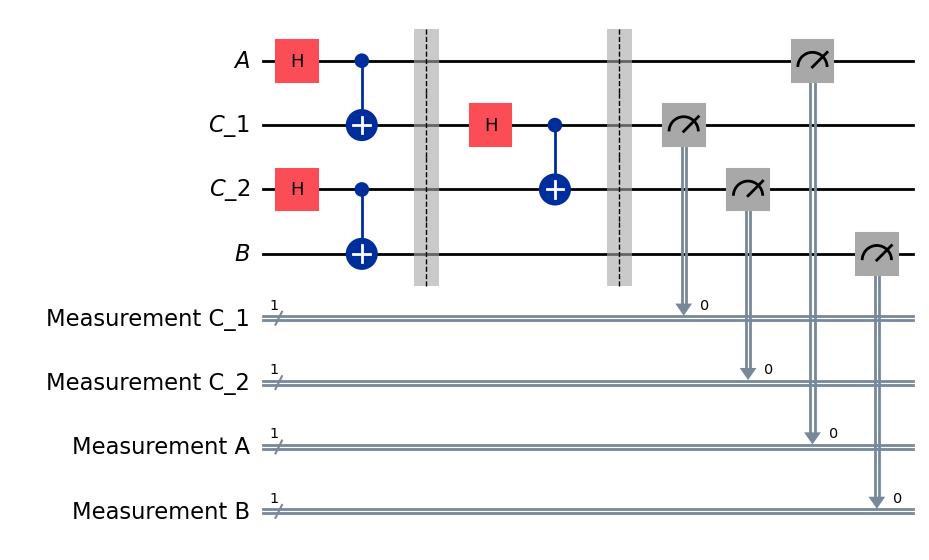

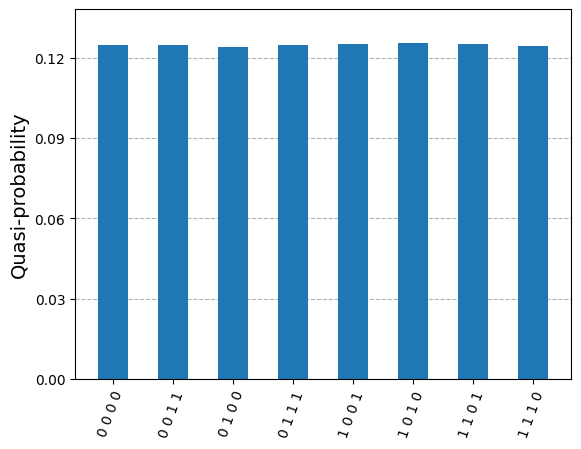

In [6]:
import qiskit as qk
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.circuit.library import XGate
from qiskit.quantum_info import DensityMatrix, Statevector


qr_A = QuantumRegister(1, name='A')
qr_C1 = QuantumRegister(1, name='C_1')
qr_B = QuantumRegister(1, name='B')
qr_C2 = QuantumRegister(1, name='C_2')
cr_C1 = ClassicalRegister(1,name='Measurement C_1')
cr_C2 = ClassicalRegister(1,name='Measurement C_2')
cr_A = ClassicalRegister(1,name='Measurement A')
cr_B = ClassicalRegister(1,name='Measurement B')

# Create QuantumCircuit
qc = qk.QuantumCircuit(qr_A, qr_C1,  qr_C2, qr_B, cr_C1, cr_C2, cr_A, cr_B, name='EntanglementSwapping')

# Preparação qubits
qc.h(0)
qc.append(XGate().control(1), [0,1]) # [controlcubits,targetcubits]
qc.h(2)
qc.append(XGate().control(1), [2,3]) # [controlcubits,targetcubits]
qc.barrier()

state = Statevector(qc)
print(state)
density_matrix = DensityMatrix(state)
print(density_matrix)

# https://quantumcomputing.stackexchange.com/questions/10115/how-to-measure-in-the-bell-basis
# Bell Measurement
qc.h(1)
qc.append(XGate().control(1), [1,2]) # [controlcubits,targetcubits]
qc.barrier()

# Measurement
qc.measure(1,0)
qc.measure(2,1)
qc.measure(0,2)
qc.measure(3,3)

qc.draw('mpl', plot_barriers=True,filename='ESWAP_circuit.png')
display(qc.draw('mpl', plot_barriers=True,filename='ESWAP_circuit.png'))


# Simulação
import qiskit_aer
from qiskit.visualization import plot_histogram

samples=1e6

backend = qiskit_aer.Aer.get_backend('qasm_simulator')
program_ = qk.transpile(qc, backend)
job = backend.run(program_, shots=samples)


result = job.result()
counts = result.get_counts()

normalized_counts = {k: v/samples for k, v in counts.items()}

plot_histogram(normalized_counts, bar_labels=False, filename='ESWAP_histogram.png')
display(plot_histogram(normalized_counts, bar_labels=False)) # eixo X ta |C_1 C_2 A B >


Simulação está de acordo com o esperado,

\begin{equation*}
\begin{aligned}
| C_1 C_2 \rangle = | 0 0 \rangle \rightarrow  |\Phi^{+}\rangle_{C_1C_2} &\rightarrow |\Phi^{+}\rangle_{AB} \\
| C_1 C_2 \rangle = | 0 1 \rangle \rightarrow  |\Phi^{-}\rangle_{C_1C_2} &\rightarrow |\Phi^{-}\rangle_{AB} \\
| C_1 C_2 \rangle = | 1 0 \rangle \rightarrow  |\Psi^{+}\rangle_{C_1C_2} &\rightarrow |\Psi^{+}\rangle_{AB} \\
| C_1 C_2 \rangle = | 1 1 \rangle \rightarrow  |\Psi^{-}\rangle_{C_1C_2} &\rightarrow |\Psi^{-}\rangle_{AB} \\
\end{aligned}
\end{equation*}

QiskitError: 'No statevector for experiment "<qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x7fa0886ace80>"'